<a href="https://colab.research.google.com/github/JohnYechanJo/Medical-Image-AI/blob/main/Data_Preparation_and_Collection/Image_Classification_Using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784', parser='auto')

In [2]:
import numpy as np
import torch
X = torch.tensor(dataset.data.to_numpy(np.float32))
y = torch.tensor(dataset.target.to_numpy(np.int64))

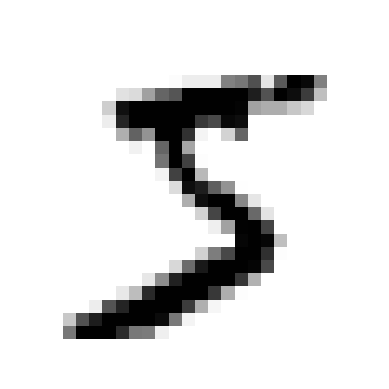

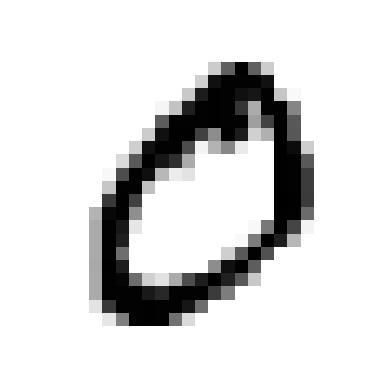

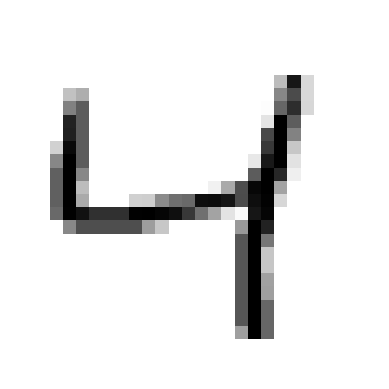

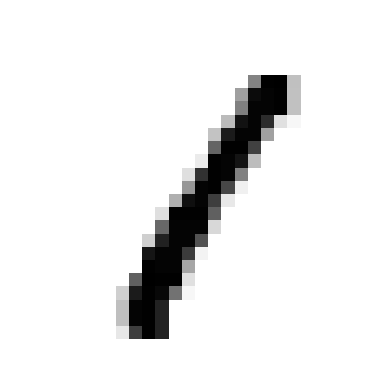

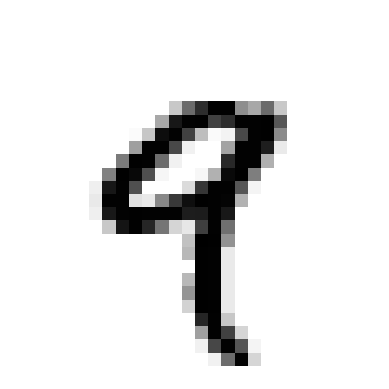

In [3]:
import matplotlib.pyplot as plt

for i in range(5):
  image = X[i].reshape(28, 28)
  plt.imshow(image, cmap = "binary")
  plt.axis("off")
  plt.show()

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
  def __init__(self, hidden_units):
    super().__init__()
    self.fc1 = nn.Linear(784, hidden_units)
    self.fc2 = nn.Linear(hidden_units, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x

In [5]:
model = MLP(1000)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [6]:
def train(model, optimizer, criterion):
  for epoch in range(100):
    y_pred = model(X)

    loss = criterion(y_pred, y)
    print(f"Epoch: {epoch} / Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train(model, optimizer, criterion)

Epoch: 0 / Loss: 27.39946746826172
Epoch: 1 / Loss: 1163.5740966796875
Epoch: 2 / Loss: 937.352783203125
Epoch: 3 / Loss: 118.39018249511719
Epoch: 4 / Loss: 81.14273834228516
Epoch: 5 / Loss: 125.86335754394531
Epoch: 6 / Loss: 27.009843826293945
Epoch: 7 / Loss: 45.24903869628906
Epoch: 8 / Loss: 89.36662292480469
Epoch: 9 / Loss: 50.54071044921875
Epoch: 10 / Loss: 148.49899291992188
Epoch: 11 / Loss: 178.53976440429688
Epoch: 12 / Loss: 227.323974609375
Epoch: 13 / Loss: 300.5968933105469
Epoch: 14 / Loss: 148.25311279296875
Epoch: 15 / Loss: 139.30455017089844
Epoch: 16 / Loss: 31.062685012817383
Epoch: 17 / Loss: 34.59360885620117
Epoch: 18 / Loss: 43.68918991088867
Epoch: 19 / Loss: 28.258691787719727
Epoch: 20 / Loss: 10.580484390258789
Epoch: 21 / Loss: 6.377216815948486
Epoch: 22 / Loss: 2.2007484436035156
Epoch: 23 / Loss: 1.221726417541504
Epoch: 24 / Loss: 1.0762240886688232
Epoch: 25 / Loss: 0.9631949663162231
Epoch: 26 / Loss: 0.8605612516403198
Epoch: 27 / Loss: 0.77869

In [7]:
y_pred = model(X[:5])
y_pred.shape

torch.Size([5, 10])

In [8]:
y_pred.argmax(1)

tensor([5, 0, 4, 1, 9])